In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import finvizfinance 
import finvizfinance.screener 
from finvizfinance.quote import finvizfinance
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline

In [2]:
# Input tickers you want to obtain news for
ticker_one = 'ARKF'
ticker_two = 'IUSB'
ticker_three = 'SPY'

In [3]:
# Obtain news for the desired number of tickers in a dataframe (i tried iterating through tickers, however I prefer this output at the expense of longer code)

etf_one = finvizfinance(ticker_one)
news_etf_one = etf_one.TickerNews()

etf_two = finvizfinance(ticker_two)
news_etf_two = etf_two.TickerNews()

etf_three = finvizfinance(ticker_three)
news_etf_three = etf_three.TickerNews()

In [4]:
news_etf_one['Ticker'] = ticker_one
news_etf_one.head()

,Date,Title,Link,Ticker
0,2021-03-30 16:45:00,Cathie Wood Details ARKX Vision,https://finance.yahoo.com/news/cathie-wood-det...,ARKF
1,2021-03-25 11:00:00,Thematic Investing on the Rise: ARK ETFs Leadi...,https://finance.yahoo.com/news/thematic-invest...,ARKF
2,2021-03-25 06:00:00,Ray Dalio: Current bubble halfway to 2000 and ...,https://finance.yahoo.com/video/ray-dalio-curr...,ARKF
3,2021-03-08 10:00:00,"ARK ETFs Erase 2021 Gains, Assets Hold",https://finance.yahoo.com/news/ark-etfs-wipe-2...,ARKF
4,2021-03-04 06:00:00,Influencers with Andy Serwer: Suze Orman,https://finance.yahoo.com/video/influencers-an...,ARKF


In [5]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Iterate through the headlines and get the polarity scores using vader
scores_etf_one = news_etf_one['Title'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_etf_one = pd.DataFrame(scores_etf_one)
scores_etf_one.head()

,neg,neu,pos,compound
0,0.0,0.667,0.333,0.2500
1,0.0,1.000,0.000,0.0000
2,0.0,1.000,0.000,0.0000
3,0.0,0.549,0.451,0.4767
4,0.0,1.000,0.000,0.0000


In [6]:
news_etf_two['Ticker'] = ticker_two
news_etf_two.head()

,Date,Title,Link,Ticker
0,2021-02-01 00:00:00,ETF Inflows Total Nearly $66B In Jan,https://finance.yahoo.com/news/etf-inflows-tot...,IUSB
1,2020-06-07 21:33:00,Why Its Time to Rethink Bonds,https://www.barrons.com/articles/with-rates-so...,IUSB
2,2020-03-22 09:47:00,12 Bond Mutual Funds and ETFs to Buy for Prote...,https://finance.yahoo.com/news/12-bond-mutual-...,IUSB
3,2020-01-30 17:16:00,Passive Bond Funds Get an Upgrade,https://www.barrons.com/articles/passive-bond-...,IUSB
4,2020-01-10 11:06:00,"A Big, Broad Bond Fund on the Cheap",https://finance.yahoo.com/news/big-broad-bond-...,IUSB


In [7]:
# Iterate through the headlines and get the polarity scores using vader
scores_etf_two = news_etf_two['Title'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_etf_two = pd.DataFrame(scores_etf_two)
scores_etf_two.head()

,neg,neu,pos,compound
0,0.0,1.000,0.000,0.0000
1,0.0,1.000,0.000,0.0000
2,0.0,1.000,0.000,0.0000
3,0.0,0.735,0.265,0.2023
4,0.0,1.000,0.000,0.0000


In [8]:
news_etf_three['Ticker'] = ticker_three
news_etf_three.head()

,Date,Title,Link,Ticker
0,2021-04-12 18:15:00,Stock market news live updates: Stock futures ...,https://finance.yahoo.com/news/stock-market-ne...,SPY
1,2021-04-12 16:01:00,Stock market news live updates: Stocks pull ba...,https://finance.yahoo.com/news/stock-market-ne...,SPY
2,2021-04-12 06:19:00,What Warren Buffett said about the 'Buffett In...,https://finance.yahoo.com/news/warren-buffett-...,SPY
3,2021-04-11 12:20:00,"Bank earnings, retail sales: What to know this...",https://finance.yahoo.com/news/bank-earnings-r...,SPY
4,2021-04-10 19:49:00,This 1 Stock Market Chart Will Make You a Smar...,https://www.fool.com/investing/2021/04/10/this...,SPY


In [9]:
# Iterate through the headlines and get the polarity scores using vader
scores_etf_three = news_etf_three['Title'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_etf_three = pd.DataFrame(scores_etf_three)
scores_etf_three.head()

,neg,neu,pos,compound
0,0.0,1.000,0.000,0.0000
1,0.0,0.909,0.091,0.1027
2,0.0,1.000,0.000,0.0000
3,0.0,1.000,0.000,0.0000
4,0.0,0.727,0.273,0.4588


In [10]:
etf_one_sentiment = pd.concat([news_etf_one, scores_etf_one], join='inner', axis=1)
etf_one_sentiment.head()

,Date,Title,Link,Ticker,neg,neu,pos,compound
0,2021-03-30 16:45:00,Cathie Wood Details ARKX Vision,https://finance.yahoo.com/news/cathie-wood-det...,ARKF,0.0,0.667,0.333,0.2500
1,2021-03-25 11:00:00,Thematic Investing on the Rise: ARK ETFs Leadi...,https://finance.yahoo.com/news/thematic-invest...,ARKF,0.0,1.000,0.000,0.0000
2,2021-03-25 06:00:00,Ray Dalio: Current bubble halfway to 2000 and ...,https://finance.yahoo.com/video/ray-dalio-curr...,ARKF,0.0,1.000,0.000,0.0000
3,2021-03-08 10:00:00,"ARK ETFs Erase 2021 Gains, Assets Hold",https://finance.yahoo.com/news/ark-etfs-wipe-2...,ARKF,0.0,0.549,0.451,0.4767
4,2021-03-04 06:00:00,Influencers with Andy Serwer: Suze Orman,https://finance.yahoo.com/video/influencers-an...,ARKF,0.0,1.000,0.000,0.0000


In [11]:
etf_two_sentiment = pd.concat([news_etf_two, scores_etf_two], join='inner', axis=1)
etf_two_sentiment.head()

,Date,Title,Link,Ticker,neg,neu,pos,compound
0,2021-02-01 00:00:00,ETF Inflows Total Nearly $66B In Jan,https://finance.yahoo.com/news/etf-inflows-tot...,IUSB,0.0,1.000,0.000,0.0000
1,2020-06-07 21:33:00,Why Its Time to Rethink Bonds,https://www.barrons.com/articles/with-rates-so...,IUSB,0.0,1.000,0.000,0.0000
2,2020-03-22 09:47:00,12 Bond Mutual Funds and ETFs to Buy for Prote...,https://finance.yahoo.com/news/12-bond-mutual-...,IUSB,0.0,1.000,0.000,0.0000
3,2020-01-30 17:16:00,Passive Bond Funds Get an Upgrade,https://www.barrons.com/articles/passive-bond-...,IUSB,0.0,0.735,0.265,0.2023
4,2020-01-10 11:06:00,"A Big, Broad Bond Fund on the Cheap",https://finance.yahoo.com/news/big-broad-bond-...,IUSB,0.0,1.000,0.000,0.0000


In [12]:
etf_three_sentiment = pd.concat([news_etf_three, scores_etf_three], join='inner', axis=1)
etf_three_sentiment.head()

,Date,Title,Link,Ticker,neg,neu,pos,compound
0,2021-04-12 18:15:00,Stock market news live updates: Stock futures ...,https://finance.yahoo.com/news/stock-market-ne...,SPY,0.0,1.000,0.000,0.0000
1,2021-04-12 16:01:00,Stock market news live updates: Stocks pull ba...,https://finance.yahoo.com/news/stock-market-ne...,SPY,0.0,0.909,0.091,0.1027
2,2021-04-12 06:19:00,What Warren Buffett said about the 'Buffett In...,https://finance.yahoo.com/news/warren-buffett-...,SPY,0.0,1.000,0.000,0.0000
3,2021-04-11 12:20:00,"Bank earnings, retail sales: What to know this...",https://finance.yahoo.com/news/bank-earnings-r...,SPY,0.0,1.000,0.000,0.0000
4,2021-04-10 19:49:00,This 1 Stock Market Chart Will Make You a Smar...,https://www.fool.com/investing/2021/04/10/this...,SPY,0.0,0.727,0.273,0.4588


In [13]:
etf_one_sentiment.describe()

,neg,neu,pos,compound
count,46.000000,46.000000,46.000000,46.000000
mean,0.039370,0.774978,0.185674,0.191798
std,0.091118,0.185728,0.184205,0.299299
min,0.000000,0.417000,0.000000,-0.493900
25%,0.000000,0.629000,0.000000,0.000000
50%,0.000000,0.750000,0.196000,0.173700
75%,0.000000,1.000000,0.339750,0.401900
max,0.365000,1.000000,0.583000,0.790600


In [14]:
etf_two_sentiment.describe()

,neg,neu,pos,compound
count,57.000000,57.000000,57.000000,57.000000
mean,0.032070,0.907368,0.060561,0.044735
std,0.085002,0.156610,0.140178,0.205872
min,0.000000,0.452000,0.000000,-0.340000
25%,0.000000,0.862000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000
max,0.324000,1.000000,0.548000,0.724500


In [15]:
etf_three_sentiment.describe()

,neg,neu,pos,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.048870,0.859200,0.091910,0.056977
std,0.101711,0.159714,0.136215,0.305490
min,0.000000,0.500000,0.000000,-0.624900
25%,0.000000,0.733000,0.000000,0.000000
50%,0.000000,0.915000,0.000000,0.000000
75%,0.000000,1.000000,0.157500,0.202300
max,0.451000,1.000000,0.500000,0.718400


In [16]:
etf_one_sentiment = etf_one_sentiment.groupby('Ticker').mean()
etf_two_sentiment = etf_two_sentiment.groupby('Ticker').mean()
etf_three_sentiment = etf_three_sentiment.groupby('Ticker').mean()

etf_sentiment_combined = pd.concat([etf_one_sentiment,etf_two_sentiment,etf_three_sentiment], join='inner', axis=0)
etf_sentiment_combined

,neg,neu,pos,compound
Ticker,,,,
ARKF,0.03937,0.774978,0.185674,0.191798
IUSB,0.03207,0.907368,0.060561,0.044735
SPY,0.04887,0.859200,0.091910,0.056977


<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='Ticker', ylabel='sentiment'>

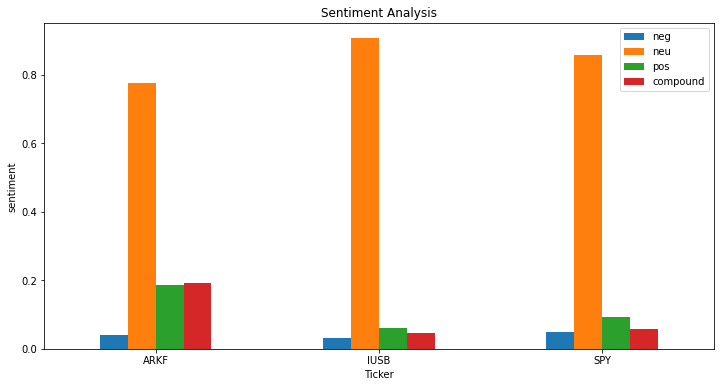

In [19]:
etf_sentiment_combined.plot.bar(figsize=(12,6),title='Sentiment Analysis',ylabel='sentiment', rot=0)